In [1]:
import pandas as pd
import sys
sys.path.append("../")
import macrophages_analysis
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import scikitplot as skplt
from sklearn.model_selection import cross_val_score, KFold

## Data import

In [2]:
preprocessed_data_path = '../../20x_datasets/Preprocessed_data/'

nucleus_dataset_p4g4_206 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_P4G4_nucleus_dataset.csv')
nucleus_dataset_smooth_206 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_Smooth_nucleus_dataset.csv')
nucleus_dataset_tcps_206 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_TCPS_nucleus_dataset.csv')
all_surfaces_206 = pd.concat([nucleus_dataset_p4g4_206, nucleus_dataset_smooth_206, nucleus_dataset_tcps_206])

nucleus_dataset_p4g4 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_P4G4_nucleus_dataset.csv')
nucleus_dataset_smooth = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_Smooth_nucleus_dataset.csv')
nucleus_dataset_tcps = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_TCPS_nucleus_dataset.csv')
all_surfaces_86 = pd.concat([nucleus_dataset_p4g4, nucleus_dataset_smooth, nucleus_dataset_tcps])

# 20x CD206 model on CD86 dataset. P4G4+TCPS+Smooth data
## 20x_CD206_model_CD86_data_all_surfaces_all_features

## Train XGBClassifier

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.8919176185531326
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.8978460551000833
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.8921285842321864


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

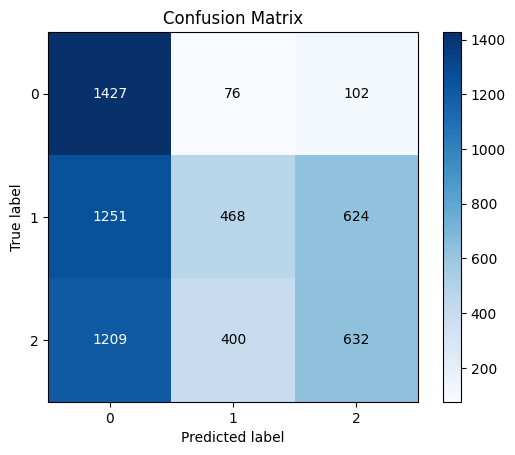

In [3]:
pipe, test_data = macrophages_analysis.make_nucleus_classifier(all_surfaces_206, confusion_matrix=False)

X_nucleus = all_surfaces_86.drop('CellType', axis=1)
y_nucleus = all_surfaces_86['CellType']

label_encoder = LabelEncoder()
y_nucleus = label_encoder.fit_transform(y_nucleus)

y_pred = pipe.predict(X_nucleus)
test_data = (X_nucleus, y_nucleus)

skplt.metrics.plot_confusion_matrix(y_nucleus, y_pred, normalize=False, title='Confusion Matrix')

--------
Mean accuracy of XGBClassifier (10-fold cross-validation) 0.8032161294914608
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.806610005531547
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.799440428649065


([<matplotlib.axis.YTick at 0x2de6d0d6010>,
 [Text(0, 0, 'M1'), Text(0, 1, 'M2')])

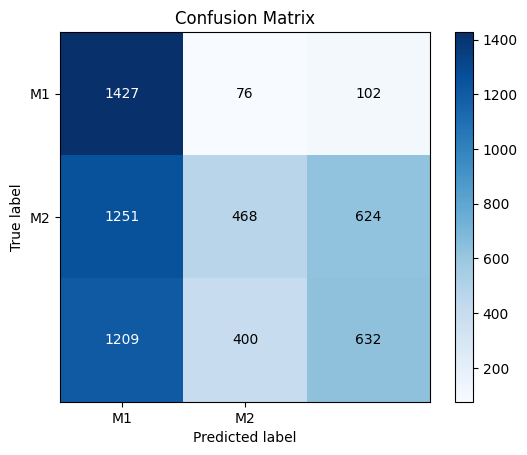

In [4]:
# Calculate accuracy and f1-macro scores using cross-validation
acc_scores = cross_val_score(pipe, X_nucleus, y_nucleus, scoring='accuracy')
f1_macro = cross_val_score(pipe, X_nucleus, y_nucleus, scoring='f1_macro')
f1_weighted = cross_val_score(pipe, X_nucleus, y_nucleus,scoring='f1_weighted')

print('--------')
print('Mean accuracy of XGBClassifier (10-fold cross-validation)', sum(acc_scores) / len(acc_scores))
print('Mean f1-macro of XGBClassifier (10-fold cross-validation)', sum(f1_macro) / len(f1_macro))
print('Mean f1_weighted of XGBClassifier (10-fold cross-validation)', sum(f1_weighted) / len(f1_weighted))

y_pred = pipe.predict(X_nucleus)

skplt.metrics.plot_confusion_matrix(y_nucleus, y_pred, normalize=False, title='Confusion Matrix')
plt.xticks(range(2),['M1', 'M2'])
plt.yticks(range(2),['M1', 'M2'])

AUC score for M1 0.7657185632811948
AUC score for M2 0.5842708911087984
AUC score for NT 0.6713322387828924
Average AUC 0.6737738977242952


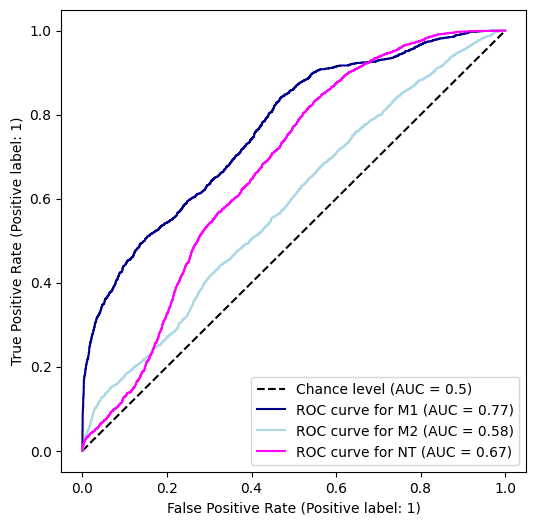

In [5]:
macrophages_analysis.make_multiclass_roc(pipe, test_data)

# 20x CD206 model on CD86 dataset. P4G4 data
## 20x_CD206_model_CD86_data_P4G4_all_features

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.9614646464646466
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.9667309573535482
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.9615293527592546


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

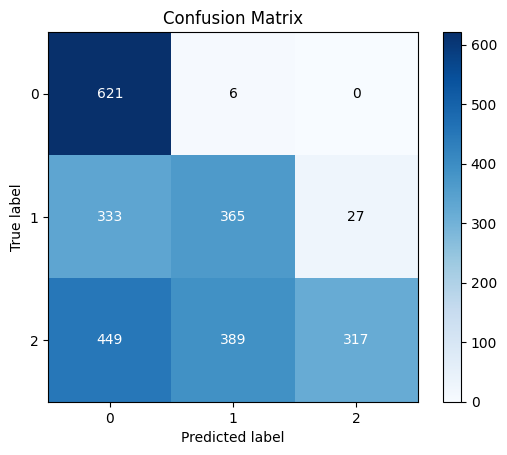

In [6]:
pipe, test_data = macrophages_analysis.make_nucleus_classifier(nucleus_dataset_p4g4_206, confusion_matrix=False)

X_nucleus = nucleus_dataset_p4g4.drop('CellType', axis=1)
y_nucleus = nucleus_dataset_p4g4['CellType']

label_encoder = LabelEncoder()
y_nucleus = label_encoder.fit_transform(y_nucleus)

y_pred = pipe.predict(X_nucleus)
test_data = (X_nucleus, y_nucleus)

skplt.metrics.plot_confusion_matrix(y_nucleus, y_pred, normalize=False, title='Confusion Matrix')

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.8228212896915332
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.8029903627396106
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.804584173106614


([<matplotlib.axis.YTick at 0x2de6d405950>,
 [Text(0, 0, 'M1'), Text(0, 1, 'M2')])

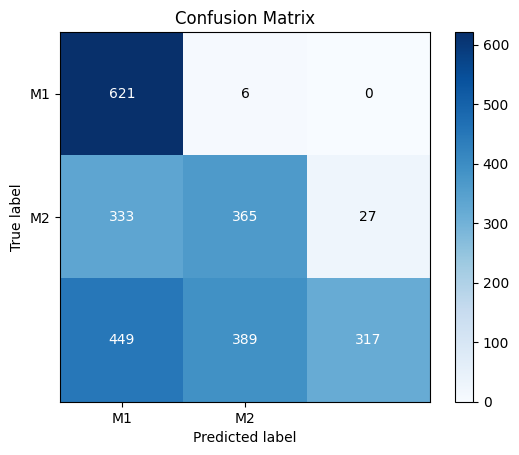

In [7]:
acc_scores = cross_val_score(pipe, X_nucleus, y_nucleus, scoring='accuracy')
f1_macro = cross_val_score(pipe, X_nucleus, y_nucleus, scoring='f1_macro')
f1_weighted = cross_val_score(pipe, X_nucleus, y_nucleus,scoring='f1_weighted')

print('Mean accuracy of XGBClassifier (10-fold cross-validation)', sum(acc_scores) / len(acc_scores))
print('Mean f1-macro of XGBClassifier (10-fold cross-validation)', sum(f1_macro) / len(f1_macro))
print('Mean f1_weighted of XGBClassifier (10-fold cross-validation)', sum(f1_weighted) / len(f1_weighted))

y_pred = pipe.predict(X_nucleus)

skplt.metrics.plot_confusion_matrix(y_nucleus, y_pred, normalize=False, title='Confusion Matrix')
plt.xticks(range(2),['M1', 'M2'])
plt.yticks(range(2),['M1', 'M2'])

AUC score for M1 0.8749482507041297
AUC score for M2 0.6570401331320871
AUC score for NT 0.8410557391326622
Average AUC 0.7910147076562929


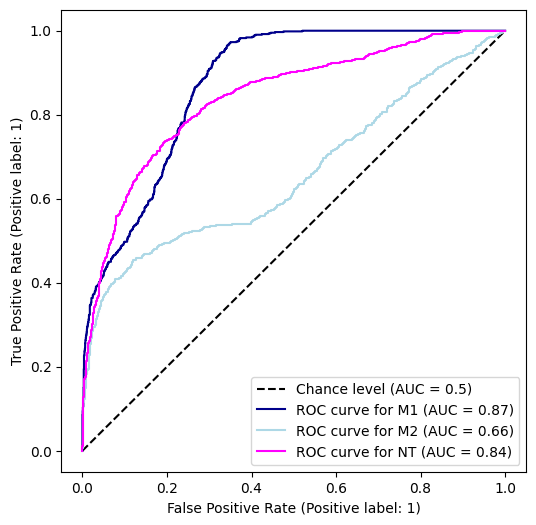

In [8]:
macrophages_analysis.make_multiclass_roc(pipe, test_data)

# 20x CD206 model on CD86 dataset. Smooth data
## 20x_CD206_model_CD86_data_Smooth_all_features

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.8874712643678162
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.8972782444944754
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.8869848999062875


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

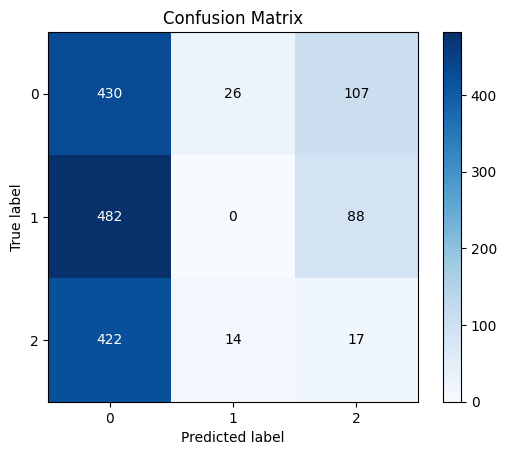

In [9]:
pipe, test_data = macrophages_analysis.make_nucleus_classifier(nucleus_dataset_smooth_206, confusion_matrix=False)

X_nucleus = nucleus_dataset_smooth.drop('CellType', axis=1)
y_nucleus = nucleus_dataset_smooth['CellType']

label_encoder = LabelEncoder()
y_nucleus = label_encoder.fit_transform(y_nucleus)

y_pred = pipe.predict(X_nucleus)
test_data = (X_nucleus, y_nucleus)

skplt.metrics.plot_confusion_matrix(y_nucleus, y_pred, normalize=False, title='Confusion Matrix')

In [10]:
acc_scores = cross_val_score(pipe, X_nucleus, y_nucleus, scoring='accuracy')
f1_macro = cross_val_score(pipe, X_nucleus, y_nucleus, scoring='f1_macro')
f1_weighted = cross_val_score(pipe, X_nucleus, y_nucleus,scoring='f1_weighted')

print('Mean accuracy of XGBClassifier (10-fold cross-validation)', sum(acc_scores) / len(acc_scores))
print('Mean f1-macro of XGBClassifier (10-fold cross-validation)', sum(f1_macro) / len(f1_macro))
print('Mean f1_weighted of XGBClassifier (10-fold cross-validation)', sum(f1_weighted) / len(f1_weighted))

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.8675416145864332
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.8680617550114575
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.8653523462916981


AUC score for M1 0.3126327157439287
AUC score for M2 0.23129921259842517
AUC score for NT 0.3605637809328416
Average AUC 0.30149856975839845


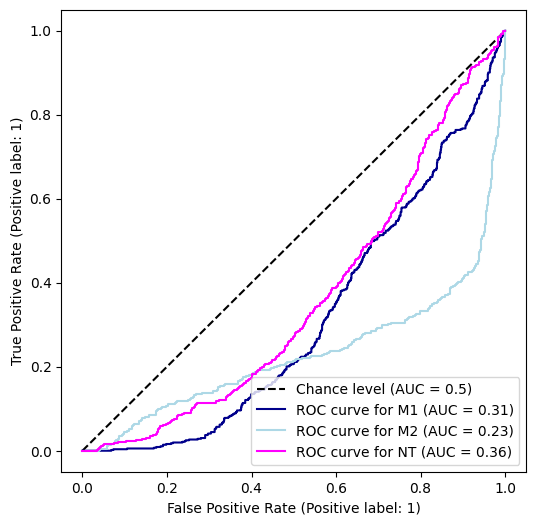

In [11]:
macrophages_analysis.make_multiclass_roc(pipe, test_data)

# 20x CD206 model on CD86 dataset. TCPS data
## 20x_CD206_model_CD86_data_TCPS_all_features

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.9115864527629232
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.913785972841246
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.9130627560041544


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

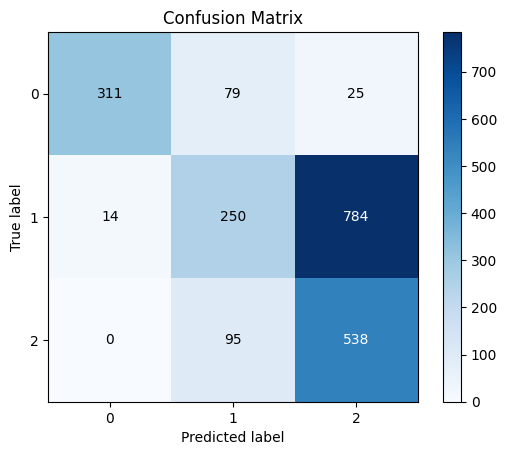

In [12]:
pipe, test_data = macrophages_analysis.make_nucleus_classifier(nucleus_dataset_tcps_206, confusion_matrix=False)

X_nucleus = nucleus_dataset_tcps.drop('CellType', axis=1)
y_nucleus = nucleus_dataset_tcps['CellType']

label_encoder = LabelEncoder()
y_nucleus = label_encoder.fit_transform(y_nucleus)

y_pred = pipe.predict(X_nucleus)
test_data = (X_nucleus, y_nucleus)

skplt.metrics.plot_confusion_matrix(y_nucleus, y_pred, normalize=False, title='Confusion Matrix')

In [13]:
acc_scores = cross_val_score(pipe, X_nucleus, y_nucleus, scoring='accuracy')
f1_macro = cross_val_score(pipe, X_nucleus, y_nucleus, scoring='f1_macro')
f1_weighted = cross_val_score(pipe, X_nucleus, y_nucleus,scoring='f1_weighted')

print('Mean accuracy of XGBClassifier (10-fold cross-validation)', sum(acc_scores) / len(acc_scores))
print('Mean f1-macro of XGBClassifier (10-fold cross-validation)', sum(f1_macro) / len(f1_macro))
print('Mean f1_weighted of XGBClassifier (10-fold cross-validation)', sum(f1_weighted) / len(f1_weighted))

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.9217604273212865
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.8983150465770808
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.9130939938453382


AUC score for M1 0.9659052629315595
AUC score for M2 0.5853661645591748
AUC score for NT 0.7058544681393272
Average AUC 0.7523752985433538


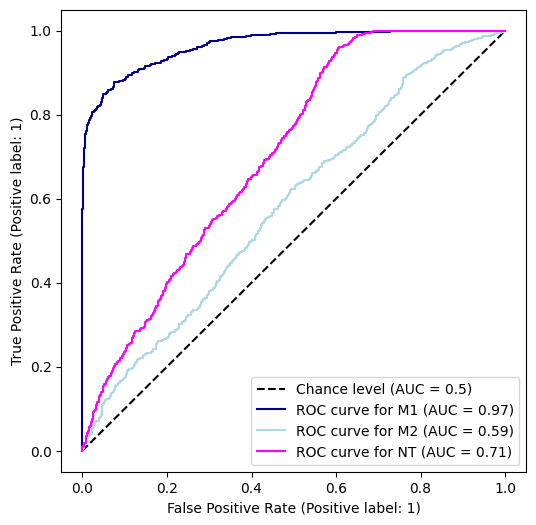

In [14]:
macrophages_analysis.make_multiclass_roc(pipe, test_data)